**SEGUNDA ENTREGA PROYECTO FINAL** - Gerson Molina.
---------

En las últimas dos décadas, la industria del comercio electrónico ha experimentado una transformación radical. Hacia el año 2010, los marketplaces digitales como Amazon comenzaron a consolidar una masividad considerable. En el camino hacia 2015, las redes sociales se afirmaron como canales de referencia y moldeadores del comportamiento del usuario. En los años subsiguientes, empresas de todas las industrias comenzaron, en diferentes escalas, a transformar digitalmente sus modelos de servicio. Sin embargo, la gran aceleración se produjo hacia el 2020, cuando la pandemia de COVID-19 forzó a los consumidores rezagados de todo el mundo a adaptar su comportamiento y, en última instancia, a volcarse inevitablemente hacia el comercio electrónico.

Si bien todo este movimiento hacia las compras en línea siempre fue evidente en países occidentales, la velocidad de adopción en naciones más allá de la cortina de Occidente no era tan clara ni consistente. Aunque países como Japón y China lideraron la adopción temprana de soluciones digitales, existía poca claridad sobre cómo se comportaban otras poblaciones masivas.

Paralelamente a esta transformación digital, el panorama global también ha sido testigo de cambios significativos, con naciones emergentes de Asia, como India y China, ascendiendo para convertirse en nuevas potencias económicas. Este fenómeno plantea una interrogante de gran envergadura: ¿cuál ha sido el impacto de la industria del comercio electrónico occidental en territorios históricamente cerrados a la globalización? ¿Se ha producido la misma aceleración digital en estos países tras la pandemia? ¿Hasta qué punto podemos proyectar la adopción digital de consumidores orientales, considerando que a este ritmo, los próximos 10 años verán en estos mercados un terreno de expansión global tan seductor como imperativo?
Con ese desafío en mente, me propuse examinar de cerca el impacto del comercio electrónico en la India, una de las grandes promesas de la próxima década. El caso de estudio se centra en las ventas de Amazon, como líder mundial del comercio electrónico; tomando una partición  de datos del 2022: los suficientemente actual para retratar un escenario post pandemia. A través de este análisis, aspiro a arrojar luz sobre el fenómeno global del comercio electrónico y cómo ha influido en las economías y sociedades de regiones anteriormente menos exploradas en este contexto.

La audiencia de este reporte es un stakeholder estratégico de una compañía global con miras de expandir su operación a la India, ingresando a través del canal electrónico. Tomando los datos de Amazon como referente, aspiro a responder algunas interrogantes básicas sobre cómo se comporta ese mercado y cuáles pueden ser las potenciales puertas de entrada.

Desde los stakeholders que buscan  insights para tomar decisiones estratégicas a los vendedores que desean comprender mejor el mercado indio en base al e-Commerce y a cualquiera interesado en el auge del comercio electrónico en la India. Los hallazgos aquí presentados pueden proporcionar información valiosa para futuras estrategias comerciales

In [114]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import os
import datetime as dt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

sns.set(style="darkgrid")
dark_palette = sns.dark_palette("#d90429", as_cmap=True)

In [115]:
ruta = '/Users/Gerson/Desktop/Data-Science.'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

In [116]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128851 entries, 0 to 128850
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128851 non-null  int64  
 1   Order ID            128851 non-null  object 
 2   Date                128851 non-null  object 
 3   Status              128851 non-null  object 
 4   Fulfilment          128851 non-null  object 
 5   ship-service-level  128851 non-null  object 
 6   Style               128851 non-null  object 
 7   SKU                 128851 non-null  object 
 8   Category            128851 non-null  object 
 9   Size                128851 non-null  object 
 10  ASIN                128851 non-null  object 
 11  Courier Status      121979 non-null  object 
 12  Qty                 128851 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128818 non-nul

In [118]:
df.duplicated().value_counts()

False    128851
Name: count, dtype: int64

In [119]:
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos, 'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0, :]
nulos_resumen = nulos_resumen.sort_values(by='Cant_Nulos', ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos
fulfilled-by,89575,0.695183
promotion-ids,49036,0.380564
currency,7671,0.059534
Amount,7671,0.059534
Courier Status,6872,0.053333
ship-state,40,0.000310
ship-postal-code,40,0.000310
ship-country,40,0.000310
ship-city,33,0.000256
B2B,7,0.000054


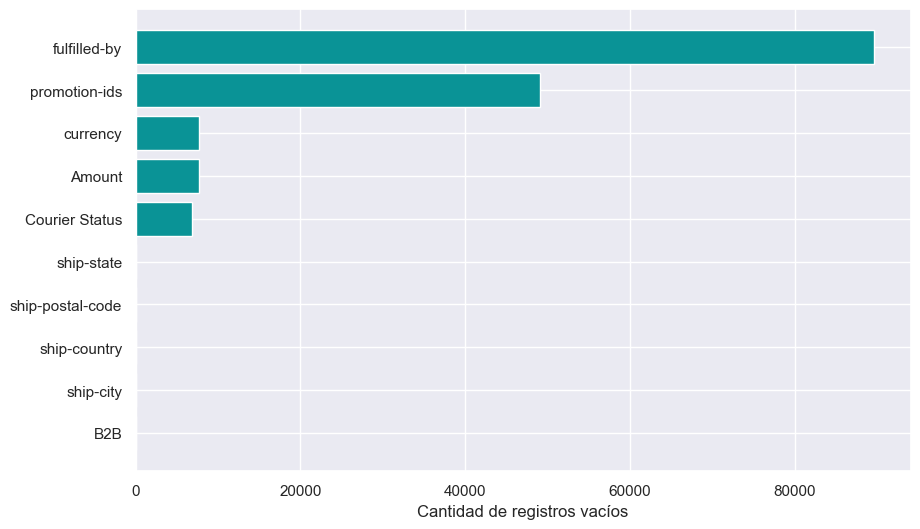

In [120]:
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index, 
         nulos_resumen['Cant_Nulos'],
         color = '#0a9396')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()  
plt.show()

In [121]:
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

df.dropna(subset=['currency', 'Amount'], inplace=True)

valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

imputer = SimpleImputer(strategy='most_frequent')

df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/1860494555.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No especificado' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['ship-postal-code'].fillna('No especificado', inplace=True)


In [122]:
# Elimino los guiones de la columna 'Order ID'
df['Order ID'] = df['Order ID'].str.replace('-', '')

# Convierto la columna a tipo numérico
df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')

In [123]:
# Defino el orden de la columna Size
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Cree una variable categórica ordenada para la columna talle
df['Size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128850
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   index               121180 non-null  int64   
 1   Order ID            121180 non-null  int64   
 2   Date                121180 non-null  object  
 3   Status              121180 non-null  object  
 4   Fulfilment          121180 non-null  object  
 5   ship-service-level  121180 non-null  object  
 6   Style               121180 non-null  object  
 7   SKU                 121180 non-null  object  
 8   Category            121180 non-null  object  
 9   Size                121180 non-null  category
 10  ASIN                121180 non-null  object  
 11  Courier Status      121180 non-null  object  
 12  Qty                 121180 non-null  int64   
 13  currency            121180 non-null  object  
 14  Amount              121180 non-null  float64 
 15  ship-city           12

Efectivamente los cambios que se realizaron en la limpieza de los datos surtieron efecto, por lo que el conjunto de los datos quedan comprendidos en 21 columnas y 121.180 registros.

In [125]:
#Verifico que en efecto no existan valores nulos.
df.isnull().value_counts()

index  Order ID  Date   Status  Fulfilment  ship-service-level  Style  SKU    Category  Size   ASIN   Courier Status  Qty    currency  Amount  ship-city  ship-state  ship-postal-code  ship-country  promotion-ids  B2B    fulfilled-by
False  False     False  False   False       False               False  False  False     False  False  False           False  False     False   False      False       False             False         False          False  False           121180
Name: count, dtype: int64

In [126]:
#convierto el campo date en formato fecha.
df['Date']=pd.to_datetime(df['Date'])

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/2547805998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [127]:
df = df[(df['Date'].dt.month != 3)]

In [128]:
df['month'] = df['Date'].dt.month
df["month"].unique()

array([ 4, 12, 11, 10,  9,  8,  7,  6,  5,  2,  1], dtype=int32)

In [129]:
mes_map = { 1: 'Ene',2: 'Feb',3: 'Mar',4: 'Abr',5: 'May',6: 'Jun',7: 'Jul',8: 'Ago',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dic'}
df['month'] = df['Date'].dt.month.map(mes_map)

In [130]:
# Defino el Orden de los meses
mes_orden = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

#Convierto la columna del mes a un tipo de datos categóricos con el orden deseado
df['month'] = pd.Categorical(df['month'], categories=mes_orden, ordered=True)

In [131]:
print(f'Estos datos contienen los meses {df["month"].unique()} for 2022')
print(f'La Fecha mas proxima es {df["Date"].min()}')
print(f'La ultima fecha es {df["Date"].max()}')

Estos datos contienen los meses ['Abr', 'Dic', 'Nov', 'Oct', 'Sep', ..., 'Jul', 'Jun', 'May', 'Feb', 'Ene']
Length: 11
Categories (12, object): ['Ene' < 'Feb' < 'Mar' < 'Abr' ... 'Sep' < 'Oct' < 'Nov' < 'Dic'] for 2022
La Fecha mas proxima es 2022-01-04 00:00:00
La ultima fecha es 2022-12-06 00:00:00


In [134]:
# Defino el orden deseado para la columna Size
ordenar_talle = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Creo una variable categórica ordenada para la columna 'Size - Talle'
df['Size'] = pd.Categorical(df['Size'], categories=ordenar_talle, ordered=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116356 entries, 0 to 128850
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               116356 non-null  int64         
 1   Order ID            116356 non-null  int64         
 2   Date                116356 non-null  datetime64[ns]
 3   Status              116356 non-null  object        
 4   Fulfilment          116356 non-null  object        
 5   ship-service-level  116356 non-null  object        
 6   Style               116356 non-null  object        
 7   SKU                 116356 non-null  object        
 8   Category            116356 non-null  object        
 9   Size                116356 non-null  category      
 10  ASIN                116356 non-null  object        
 11  Courier Status      116356 non-null  object        
 12  Qty                 116356 non-null  int64         
 13  currency            116356 non-nul

In [136]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
month                 0
dtype: int64

In [137]:
df.nunique().to_frame(name='Cuenta Valores Unicos')

,Cuenta Valores Unicos
index,116356
Order ID,108522
Date,87
Status,4
Fulfilment,2
ship-service-level,2
Style,1365
SKU,7115
Category,9
Size,11


In [138]:
df.apply(pd.unique).to_frame(name='Valores Unicos')

,Valores Unicos
index,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14..."
Order ID,"[40580787845731545, 17191981511101146, 4040687..."
Date,"[2022-04-30T00:00:00.000000000, 2022-04-29T00:..."
Status,"[Cancelled, Shipped, Shipped - Returning to Se..."
Fulfilment,"[Merchant, Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
Size,"['S', '3XL', 'XL', 'L', 'XXL', ..., '6XL', 'M'..."


In [139]:
ingresos_por_mes = df.groupby('month')['Amount'].sum()
disminucion_porcentual_abr_a_may = (ingresos_por_mes['Abr'] - ingresos_por_mes['May']) / ingresos_por_mes['Abr'] * 100
disminucion_porcentual_may_a_jun = (ingresos_por_mes['May'] - ingresos_por_mes['Jun']) / ingresos_por_mes['May'] * 100
disminucion_total = (ingresos_por_mes['Abr'] - ingresos_por_mes['Jun']) / ingresos_por_mes['Abr'] * 100
print(f"Total ingresos por Abril 2022: ${ingresos_por_mes['Abr']:,.2f}")
print(f"Total ingresos por Mayo 2022: ${ingresos_por_mes['May']:,.2f}, which is a -{disminucion_porcentual_abr_a_may:.2f}% disminucion por Abril.")
print(f"Total ingresos por Junio 2022: ${ingresos_por_mes['Jun']:,.2f}, which is a -{disminucion_porcentual_may_a_jun:.2f}% dismicucion por Mayo.")
print(f"Total ingresos por Q2 2022 disminucion en -{disminucion_total:.2f}%")
print("\n")

ingresos_por_categoria = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print("Total ingresos por categoria:")
print(ingresos_por_categoria.apply(lambda x: "${:,.2f}".format(x)))
print("\n")

ingresos_por_categoria = df.groupby('Category')['Amount'].sum()
porcentaje_ingresos_por_categoria = ((ingresos_por_categoria / ingresos_por_categoria.sum()) * 100).sort_values(ascending=False)
porcentaje_ingresos_por_categoria = porcentaje_ingresos_por_categoria.apply(lambda x: "{:.2f}%".format(x))
print("Porcentaje de ingresos por categoria:")
print(porcentaje_ingresos_por_categoria)
print("\n")

precio_promedio_categoria = df.groupby('Category')['Amount'].mean()
precio_promedio_categoria = precio_promedio_categoria.sort_values(ascending=False)
print("Top 5 Categorias por precio promedio:")
print(precio_promedio_categoria.head(5))
print("\n")

pedidos_mensuales = df.groupby(pd.Grouper(key='Date', freq='M')).agg({'Amount': 'mean', 'Order ID': 'mean'})
pedidos_mensuales = pedidos_mensuales.rename(columns={'Amount': 'Precio promedio monto', 'Order ID': 'Precio promedio cantidad'})
print(pedidos_mensuales)
print("\n")

categoria_popular_estado = df.groupby(['ship-city', 'Category'])['Order ID'].sum().reset_index()
categoria_popular_estado = categoria_popular_estado.sort_values(['ship-city', 'Order ID'], ascending=[True, False])
categoria_popular_estado = categoria_popular_estado.drop_duplicates(subset=['ship-city'])
print("Categoria de producto popular por estado:")
print(categoria_popular_estado)
print("\n")



Total ingresos por Abril 2022: $20,500,095.00
Total ingresos por Mayo 2022: $17,821,991.32, which is a -13.06% disminucion por Abril.
Total ingresos por Junio 2022: $15,262,409.88, which is a -14.36% dismicucion por Mayo.
Total ingresos por Q2 2022 disminucion en -25.55%


Total ingresos por categoria:
Category
Set              $37,627,337.92
kurta            $20,403,561.23
Western Dress    $10,874,344.89
Top               $5,169,819.72
Ethnic Dress        $766,296.37
Blouse              $441,021.42
Bottom              $149,483.98
Saree               $117,587.76
Dupatta                 $915.00
Name: Amount, dtype: object


Porcentaje de ingresos por categoria:
Category
Set              49.80%
kurta            27.01%
Western Dress    14.39%
Top               6.84%
Ethnic Dress      1.01%
Blouse            0.58%
Bottom            0.20%
Saree             0.16%
Dupatta           0.00%
Name: Amount, dtype: object


Top 5 Categorias por precio promedio:
Category
Set              834.327544
S

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/2920713024.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ingresos_por_mes = df.groupby('month')['Amount'].sum()


**QUE TALLES DE PRODUCTOS FUERON LOS MAS VENDIDOS**

/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/944137279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ventas_por_talle = df.groupby('Size')['Amount'].sum()
/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/944137279.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_talle.index, y=ventas_por_talle.values, ax=ax, palette=palette_colors)
/var/folders/kg/bj4nwrzj2k71bwdyw9wl8ll40000gp/T/ipykernel_4485/944137279.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(list(range(0,20,2)))


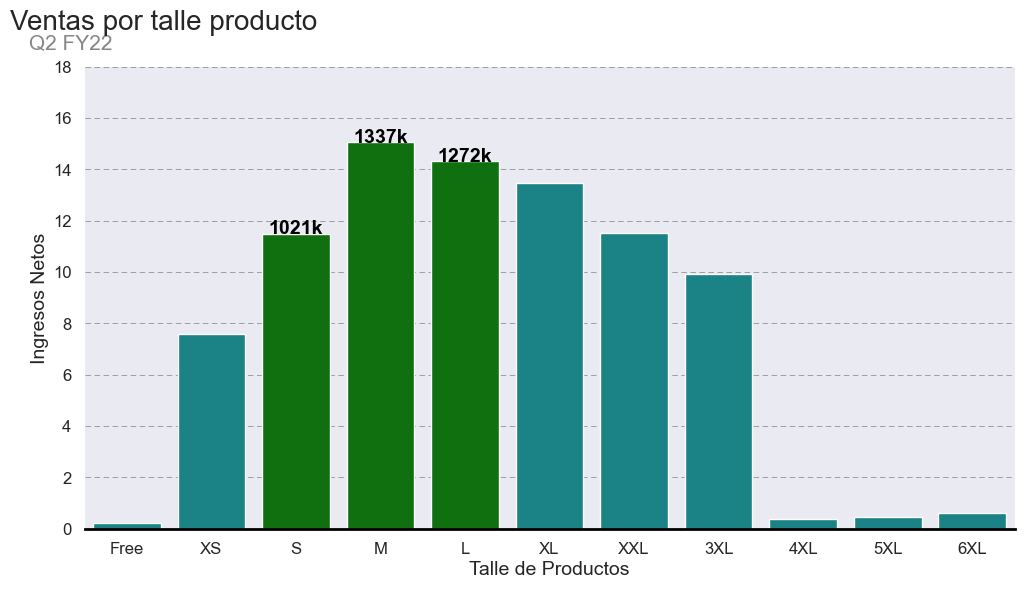

In [153]:
# Agrupo por total de Ventfas
ventas_por_talle = df.groupby('Size')['Amount'].sum()

# Creo un gráfico de barras horizontales para mostrar las ventas por tamaño de producto.
fig, ax = plt.subplots(figsize=(12,6))

# Resalto los talles con mas ventas
palette_colors = ['green' if size in ['S', 'M', 'L'] else '#0a9396' for size in ventas_por_talle.index]
sns.barplot(x=ventas_por_talle.index, y=ventas_por_talle.values, ax=ax, palette=palette_colors)


# Establezco tamaños y titulos para los ejes X y Y respectivamente
ax.set_xlabel('Talle de Productos', labelpad=3, fontsize=14)
ax.set_ylabel('Ingresos Netos', labelpad=3, fontsize=14)
ax.set_yticklabels(list(range(0,20,2)))
ax.set_title('Ventas por talle producto', fontsize=20, x=0.085, y=1.05, pad=10)
ax.text(-0.06, 1.04, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)
#ax.set_title('Ingresos de productos principales por mes', fontsize=20, x=.22, y=1.07)


ax.tick_params(axis='both', labelsize=12)
ax.yaxis.grid(linestyle='--', color='gray', linewidth=0.5, dashes=(8, 5))
ax.xaxis.grid(False)


# Establezco el numero de tick que deseo
num_y_ticks = 10

# Calculo el valor de los ticks
y_tick_values = np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], num_y_ticks)
ax.set_yticks(y_tick_values)

# Establezco tamaños de fuente para las barras y agrego anotaciones para los tamaños S, M y L
for i, size in enumerate(ventas_por_talle.index):
    if size in ['S', 'M', 'L']:
        ax.text(i, ventas_por_talle.values[i], f'{ventas_por_talle.values[i]/10000:.0f}k', ha='center', fontsize=14, fontweight='bold', color='black')


# Retiro las espinas
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

plt.show()

**CUAL FUE EL MES CON LA VENTA MAS ALTA**

In [141]:
#Extraer el mes.
df['Mes']=df['Date'].dt.month

#Realizamos la multiplicación de precio por cantidad. 
df['Total Ventas']=df['Qty']*df['Amount']

In [142]:
df_mes=df.groupby('Mes')['Total Ventas'].sum()

#Resetear Mes.
df_mes=df_mes.reset_index()

In [143]:
df_mes

,Mes,Total Ventas
0,1,2803434.0
1,2,2919029.0
2,4,19729926.0
3,5,17214499.0
4,6,14826227.0
5,7,2725080.0
6,8,2757792.0
7,9,2647720.0
8,10,2529449.0
9,11,2470613.0


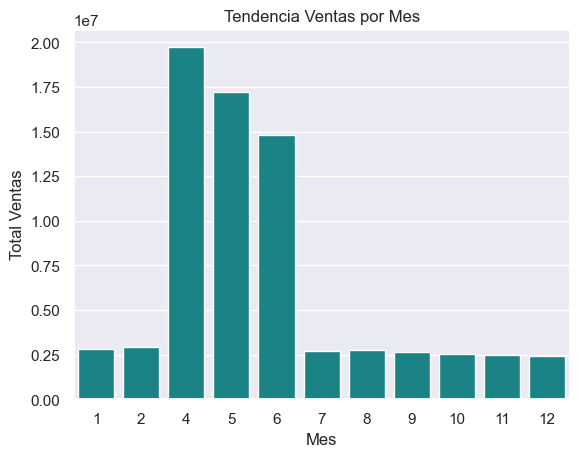

In [144]:
sns.barplot(x='Mes', y='Total Ventas', data=df_mes, color='#0a9396')
plt.title('Tendencia Ventas por Mes')
plt.xlabel('Mes')
plt.show()


Las ventas se observan amesetadas a lo largo del año, excepto un pico durante los meses de verano (Abril, Mayo, Junio), que registran hasta 6 veces mas las ventas, lo cual puede deberse a estacionalidad. Siendo Abril el mes con mayor cantidad de ventas.

**CUAL FUE LA CIUDAD CON MAYOR VENTA**

In [145]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,month,Mes,Total Ventas
0,0,40580787845731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,MUMBAI,MAHARASHTRA,400081.0,IN,No especificado,False,Easy Ship,Abr,4,0.0
1,1,17191981511101146,2022-04-30,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,Abr,4,406.0
2,2,40406876767273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,Abr,4,329.0
3,3,40396153778133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,PUDUCHERRY,PUDUCHERRY,605008.0,IN,No especificado,False,Easy Ship,Abr,4,0.0
4,4,40710697907240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,CHENNAI,TAMIL NADU,600073.0,IN,No especificado,False,Easy Ship,Abr,4,574.0


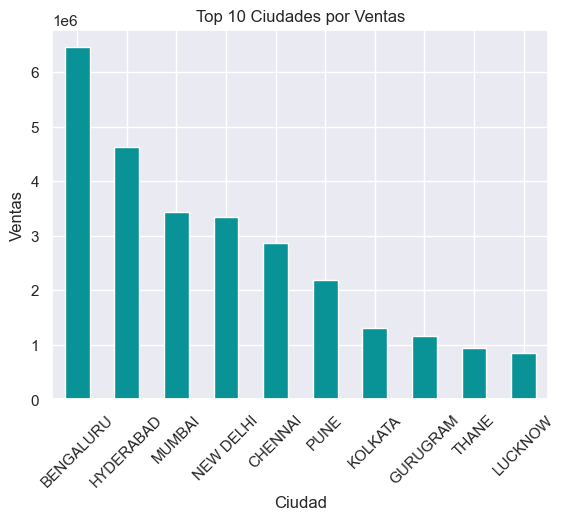

In [146]:
ventas_por_ciudad = df.groupby('ship-city')['Total Ventas'].sum()

# Ordenar los datos para una mejor visualización
ventas_por_ciudad = ventas_por_ciudad.sort_values(ascending=False)

# Crear un gráfico de barras
ventas_por_ciudad.head(10).plot(kind='bar', color='#0a9396')
plt.title('Top 10 Ciudades por Ventas')
plt.xlabel('Ciudad')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.show()

Podemos determinar que la mayor cantidad de ventas se concentran en ciudades como Bengaluru, Hhyderabad y Mumbai.

In [147]:
ventas_por_categoria = df.groupby(['Category', 'Mes'])['Total Ventas'].sum().reset_index()

ventas_por_categoria


,Category,Mes,Total Ventas
0,Blouse,1,19696.0
1,Blouse,2,15594.0
2,Blouse,4,128091.0
3,Blouse,5,93046.0
4,Blouse,6,73167.0
...,...,...,...
84,kurta,8,737013.0
85,kurta,9,758519.0
86,kurta,10,685590.0
87,kurta,11,654970.0


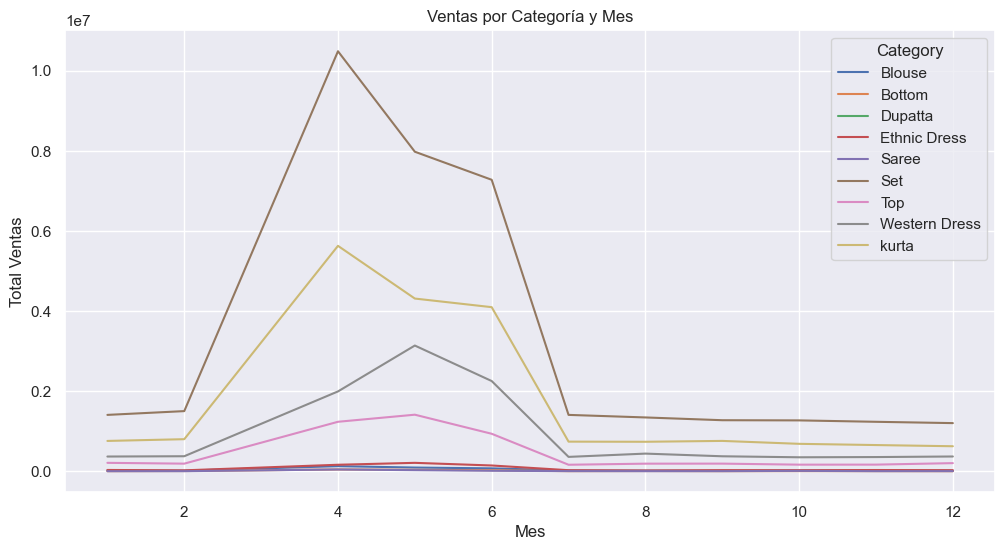

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes', y='Total Ventas', hue='Category', data=ventas_por_categoria)
plt.title('Ventas por Categoría y Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.show()

Vemos una fuerte tendencia en la venta por categoría en función de los meses, siendo de manera permanente a lo largo del tiempo las categorías "SET", "Kurta" y "Western Dress" los productos mas vendidos.

In [149]:
pedidos_cancelados = df[df['Status'] == 'Cancelled']
pedidos_enviados = df[df['Status'] == 'Shipped']

# Calculamos la cantidad de pedidos cancelados y enviados
cantidad_pedidos_cancelados = len(pedidos_cancelados)
cantidad_pedidos_enviados = len(pedidos_enviados)

# Calculamos la proporción
proporcion_cancelados_vs_enviados = cantidad_pedidos_cancelados / cantidad_pedidos_enviados

print(f"Proporción de pedidos cancelados respecto a los enviados: {proporcion_cancelados_vs_enviados:.2%}")

Proporción de pedidos cancelados respecto a los enviados: 9.86%


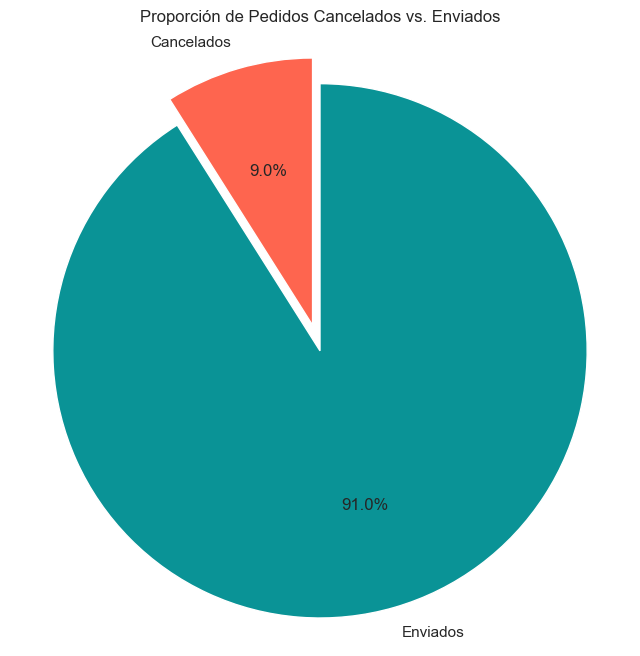

In [150]:
# Gráficamos

cantidades = [cantidad_pedidos_cancelados, cantidad_pedidos_enviados]
etiquetas = ['Cancelados', 'Enviados']
colores = ['#fe654f','#0a9396']

# Destacamos la parte de pedidos cancelados
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Proporción de Pedidos Cancelados vs. Enviados')
plt.axis('equal')
plt.show()